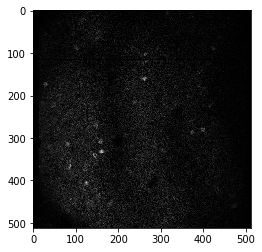

In [19]:
import cv2
frame_no = 499
cap = cv2.VideoCapture('Databinary/substack500_7fps_00.avi') #video_name is the video being called
cap.set(1,frame_no); # Where frame_no is the frame you want
ret, frame = cap.read() # Read the frame
plt.imshow(frame)
plt.show()

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import keras
import cv2

/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## STATEFUL batch_shape = [1, frag_len, x, y, 1]
    1 sample at a time
    update made after no_fragments batches
    y = [1, 1, x, y, 1]

DEFINE DATA FEEDER

In [364]:
class Batch_size_1_Generator(object):

    def __init__(self, frag_len, steps = 1):
        self.frag_len = frag_len
        #print(frag_len)
        # this will track the progress of the batches sequentially through the
        # data set - once the data reaches the end of the data set it will reset
        # back to zero
        self.current_idx = 0
        self.current_count = 0
        self.data = None
        # dimensions expected by the network
        self.dims = (400,256)
        self.steps = steps
    
        #self.dup_rows()
        # skip_step is the number of words which will be skipped before the next
        # batch is skimmed from the data set

    def dup_rows(self, a, indx, num_dups=1):
        return np.insert(a,[indx+1]*num_dups,a[indx],axis=0)
    
    def _resizer(self, data, dimso):
        """
        data : the image to be resized 
        dimso : the dimensions to be resized to (tuple)
        """
        data = cv2.resize(data, dimso)
        img = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
        return img
    
    def generate(self):
        # this generator returns no_frag fragments for each sample before moving to the next sample
        while True:
            #print(self.current_idx)
            #print(self.current_count)
           
            if self.current_count == 0:
                self.current_idx = np.random.randint(10)
            #self.current_idx = 200
            video = cv2.VideoCapture('Databinary/substack500_7fps_0' + str(self.current_idx) + '.avi')
            #self.data = np.load('dummies/video_' + str(self.current_idx) + '.npy')

            data_len = 500
            # find out number of fragments for data
            no_frags = int((data_len-frag_len + 1)/steps)
            #print("No frags inside " + str(no_frags))
            self.current_count += 1
            print('current sample number: ' + str(self.current_idx)+', Fragment ' + str(self.current_count)+ ' of ' + str(no_frags))
            
            if self.current_count == no_frags:
                print(self.current_count)
                self.current_count = 0
            data_range = (self.current_count,self.current_count+ self.frag_len)
            #print(data_range)
            
            x = []

            # data_range is the range of frames to be fetched for each fragment
            indxs = np.arange(current_count,current_count+ frag_len, steps)
            #for indexer in range(data_range[0],data_range[1]):
            for indexer in indxs:

                video.set(1,indexer) # Where frame_no is the frame you want
                ret, frame = video.read() # Read the frame
                x.append(self._resizer(frame, self.dims))
            #print('fragment in sample ' + str(self.current_count))
            #print('No frags ' + str(no_frags))
            
            #ysing = np.load('dummies/label_' + str(self.current_idx) + '.npy')
            #y = np.expand_dims(self.dup_rows(ysing, 0, self.frag_len-1),axis = 0)
             
            labels = cv2.VideoCapture('Databinary/substack500_7fps_0' + str(self.current_idx) + '.label.tif')
            labels.set(1,1)
            ret,lab_frame = labels.read()
            y = []
            for indx in range(int((self.frag_len+1)/self.steps)):
                y.append(self._resizer(lab_frame, self.dims))
                
            y = np.expand_dims(y, axis=-1)
            x = np.expand_dims(x, axis=-1)
            y = np.expand_dims(y, axis=0)
            x = np.expand_dims(x, axis=0)
           
            #yield x,y
            yield x,y
            

no of fragments and length of fragments changes with the step size so the real length becomes (frag_len+1)/steps and number of fragments is (data_len-frag_len + 1)/steps

In [408]:
example = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, 21, 22]
data_len = len(example)
frag_len = 11
steps = 2
no_frags = int((data_len-frag_len + 1))
print(no_frags)

for current_count in range(no_frags):
    #ranger = list(range(current_count,current_count+ frag_len))
    indx = np.arange(current_count*steps,current_count*steps+ frag_len, steps)
    print(np.array(example)[indx.astype(int)])
(np.array(example)[indx.astype(int)]).shape

12
[ 1  3  5  7  9 11]
[ 3  5  7  9 11 13]
[ 5  7  9 11 13 15]
[ 7  9 11 13 15 17]
[ 9 11 13 15 17 19]
[11 13 15 17 19 21]


IndexError: index 22 is out of bounds for axis 1 with size 22

no of fragments does not change with the step size but, the actual length of the fragment is changed by the step size. so the real length becomes (frag_len+1)/steps 

In [375]:
example = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, 21, 22]
data_len = len(example)
frag_len = 11
steps = 2
no_frags = int(data_len-frag_len + 1)
print(no_frags)

for current_count in range(no_frags):
    #ranger = list(range(current_count,current_count+ frag_len))
    indx = np.arange(current_count,current_count+ frag_len, steps)
    print(np.array(example)[indx.astype(int)])
(np.array(example)[indx.astype(int)])

12
[ 1  3  5  7  9 11]
[ 2  4  6  8 10 12]
[ 3  5  7  9 11 13]
[ 4  6  8 10 12 14]
[ 5  7  9 11 13 15]
[ 6  8 10 12 14 16]
[ 7  9 11 13 15 17]
[ 8 10 12 14 16 18]
[ 9 11 13 15 17 19]
[10 12 14 16 18 20]
[11 13 15 17 19 21]
[12 14 16 18 20 22]


array([12, 14, 16, 18, 20, 22])

Quick check to make sure the data is loaded correctly by the data generator

In [401]:
steps = 2
frag_len = 40
true_frag_len = int((frag_len+1)/steps)
print('True fragment length ' +str(true_frag_len))
gener_obj = Batch_size_1_Generator(frag_len, steps)
gener = gener_obj.generate()
X,y = next(gener)

True fragment length 20
current sample number: 3, Fragment 1 of 461


In [402]:
X.shape, y.shape

((1, 20, 256, 400, 1), (1, 20, 256, 400, 1))

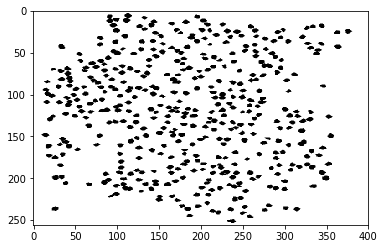

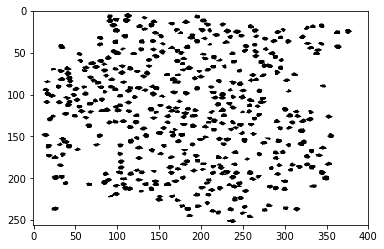

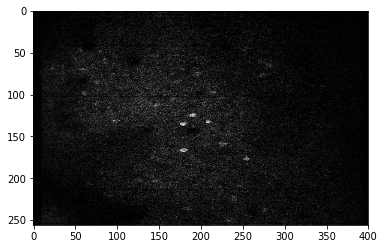

In [383]:
vect = cv2.VideoCapture("Databinary/substack500_7fps_04.label.tif")
vect.set(1,1)
ret,lab_frame = vect.read()
lab_frame = cv2.resize(lab_frame,(400,256))
#truth = lab_frame[0].reshape(256,400)
plt.imshow(lab_frame, cmap = 'gray')
plt.show()

plt.imshow(y[0][0].reshape(256,400), cmap = 'gray')
plt.show()

plt.imshow(X[0][0].reshape(256,400), cmap = 'gray')
plt.show()

DEFINE MODEL

In [395]:
from keras.models import Model
from keras.layers.convolutional import Conv3D, Conv2D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, TimeDistributed
import keras.backend as K
import tensorflow as tf

K.tensorflow_backend.set_session(tf.Session(config=tf.ConfigProto(device_count = {'GPU': 0})))

def load_model(true_frag_len):
    input_shape = (None, 256, 400, 1)
    input = Input(batch_shape= [1, true_frag_len, 256,400, 1])

    x = ConvLSTM2D(filters=14, kernel_size=(3, 3),
                       input_shape=input_shape,
                       padding='same', 
                       return_sequences=True,
                       stateful = True)(input)
    x = BatchNormalization()(x)
    x = TimeDistributed(Conv2D(filters=2, kernel_size=(3,3), padding='same',activation='relu'))(x)
    output = TimeDistributed(Conv2D(filters=1, kernel_size=(1,1), padding='same', activation='sigmoid'), name='output')(x)
    # output = Conv3D(filters=1, kernel_size=(3, 3, 3),
    #                    activation='sigmoid',
    #                    padding='same', data_format='channels_last')(x)


    model_stateful_batch1 = Model(inputs = [input], output=[output])
    model_stateful_batch1.compile(loss='binary_crossentropy', optimizer='adadelta')
    model_stateful_batch1.summary()
    return model_stateful_batch1

TRAIN

In [403]:
data_len = 500
steps = 2
frag_len = 40
true_frag_len = int((frag_len+1)/steps)
no_frags = int((data_len-frag_len + 1)/steps)
print(no_frags)
print(true_frag_len)
model_stateful_batch1 = load_model(true_frag_len)
gener = Batch_size_1_Generator(frag_len, steps)

230
20
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (1, 20, 256, 400, 1)      0         
_________________________________________________________________
conv_lst_m2d_13 (ConvLSTM2D) (1, 20, 256, 400, 14)     7616      
_________________________________________________________________
batch_normalization_13 (Batc (1, 20, 256, 400, 14)     56        
_________________________________________________________________
time_distributed_13 (TimeDis (1, 20, 256, 400, 2)      254       
_________________________________________________________________
output (TimeDistributed)     (1, 20, 256, 400, 1)      3         
Total params: 7,929
Trainable params: 7,901
Non-trainable params: 28
_________________________________________________________________


/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`


In [404]:
no_samples = 2
reps_for_samples = no_samples*no_frags
print("Number of training reps " + str(reps_for_samples))

for reps in range(reps_for_samples):
    if reps%(no_frags) == 0:
        print ('Time to reset states')
        model_stateful_batch1.reset_states()
    train_loss = 0
    X,Y = next(gener.generate())
    train_loss += model_stateful_batch1.train_on_batch(X, Y)
    #print ('# epoch', reps, '  loss ', train_loss/float(Y.shape[0]))
    if reps%no_frags == 0:
        print ('# epoch', reps, '  loss ', train_loss/float(Y.shape[0]))
        print(train_loss)

Number of training reps 460
Time to reset states
current sample number: 7, Fragment 1 of 461
# epoch 0   loss  116.17617797851562
116.17617797851562
current sample number: 7, Fragment 2 of 461
current sample number: 7, Fragment 3 of 461
current sample number: 7, Fragment 4 of 461
current sample number: 7, Fragment 5 of 461
current sample number: 7, Fragment 6 of 461
current sample number: 7, Fragment 7 of 461
current sample number: 7, Fragment 8 of 461
current sample number: 7, Fragment 9 of 461
current sample number: 7, Fragment 10 of 461
current sample number: 7, Fragment 11 of 461
current sample number: 7, Fragment 12 of 461
current sample number: 7, Fragment 13 of 461
current sample number: 7, Fragment 14 of 461
current sample number: 7, Fragment 15 of 461
current sample number: 7, Fragment 16 of 461
current sample number: 7, Fragment 17 of 461
current sample number: 7, Fragment 18 of 461
current sample number: 7, Fragment 19 of 461
current sample number: 7, Fragment 20 of 461
curr

current sample number: 7, Fragment 180 of 461
current sample number: 7, Fragment 181 of 461
current sample number: 7, Fragment 182 of 461
current sample number: 7, Fragment 183 of 461
current sample number: 7, Fragment 184 of 461
current sample number: 7, Fragment 185 of 461
current sample number: 7, Fragment 186 of 461
current sample number: 7, Fragment 187 of 461
current sample number: 7, Fragment 188 of 461
current sample number: 7, Fragment 189 of 461
current sample number: 7, Fragment 190 of 461
current sample number: 7, Fragment 191 of 461
current sample number: 7, Fragment 192 of 461
current sample number: 7, Fragment 193 of 461
current sample number: 7, Fragment 194 of 461
current sample number: 7, Fragment 195 of 461
current sample number: 7, Fragment 196 of 461
current sample number: 7, Fragment 197 of 461
current sample number: 7, Fragment 198 of 461
current sample number: 7, Fragment 199 of 461
current sample number: 7, Fragment 200 of 461
current sample number: 7, Fragment

current sample number: 7, Fragment 357 of 461
current sample number: 7, Fragment 358 of 461
current sample number: 7, Fragment 359 of 461
current sample number: 7, Fragment 360 of 461
current sample number: 7, Fragment 361 of 461
current sample number: 7, Fragment 362 of 461
current sample number: 7, Fragment 363 of 461
current sample number: 7, Fragment 364 of 461
current sample number: 7, Fragment 365 of 461
current sample number: 7, Fragment 366 of 461
current sample number: 7, Fragment 367 of 461
current sample number: 7, Fragment 368 of 461
current sample number: 7, Fragment 369 of 461
current sample number: 7, Fragment 370 of 461
current sample number: 7, Fragment 371 of 461
current sample number: 7, Fragment 372 of 461
current sample number: 7, Fragment 373 of 461
current sample number: 7, Fragment 374 of 461
current sample number: 7, Fragment 375 of 461
current sample number: 7, Fragment 376 of 461
current sample number: 7, Fragment 377 of 461
current sample number: 7, Fragment

PREDICT

In [406]:
# Predict using just a single sample loaded from file
gener_1 = Batch_size_1_Generator(frag_len, steps).generate()

In [407]:

# this just tests out one sample. I think it is necessary to reset states on prediction too
stateful_preds = []
model_stateful_batch1.reset_states()
for fragment in range(no_frags):
    X,Y = next(gener_1)
    stateful_batch_1 = model_stateful_batch1.predict_on_batch(X)
    stateful_preds.append(stateful_batch_1)
model_stateful_batch1.reset_states() 

current sample number: 0, Fragment 1 of 461
current sample number: 0, Fragment 2 of 461
current sample number: 0, Fragment 3 of 461
current sample number: 0, Fragment 4 of 461
current sample number: 0, Fragment 5 of 461
current sample number: 0, Fragment 6 of 461
current sample number: 0, Fragment 7 of 461
current sample number: 0, Fragment 8 of 461
current sample number: 0, Fragment 9 of 461
current sample number: 0, Fragment 10 of 461
current sample number: 0, Fragment 11 of 461
current sample number: 0, Fragment 12 of 461
current sample number: 0, Fragment 13 of 461
current sample number: 0, Fragment 14 of 461
current sample number: 0, Fragment 15 of 461
current sample number: 0, Fragment 16 of 461
current sample number: 0, Fragment 17 of 461
current sample number: 0, Fragment 18 of 461
current sample number: 0, Fragment 19 of 461
current sample number: 0, Fragment 20 of 461
current sample number: 0, Fragment 21 of 461
current sample number: 0, Fragment 22 of 461
current sample numb

current sample number: 0, Fragment 182 of 461
current sample number: 0, Fragment 183 of 461
current sample number: 0, Fragment 184 of 461
current sample number: 0, Fragment 185 of 461
current sample number: 0, Fragment 186 of 461
current sample number: 0, Fragment 187 of 461
current sample number: 0, Fragment 188 of 461
current sample number: 0, Fragment 189 of 461
current sample number: 0, Fragment 190 of 461
current sample number: 0, Fragment 191 of 461
current sample number: 0, Fragment 192 of 461
current sample number: 0, Fragment 193 of 461
current sample number: 0, Fragment 194 of 461
current sample number: 0, Fragment 195 of 461
current sample number: 0, Fragment 196 of 461
current sample number: 0, Fragment 197 of 461
current sample number: 0, Fragment 198 of 461
current sample number: 0, Fragment 199 of 461
current sample number: 0, Fragment 200 of 461
current sample number: 0, Fragment 201 of 461
current sample number: 0, Fragment 202 of 461
current sample number: 0, Fragment

In [409]:
len(stateful_preds), stateful_preds[0].shape

(230, (1, 20, 256, 400, 1))

In [412]:
predicted = stateful_preds[0].reshape(20,256,400)

vect = cv2.VideoCapture("Databinary/substack500_7fps_00.label.tif")
vect.set(1,1)
ret,lab_frame = vect.read()
lab_frame = cv2.resize(lab_frame,(400,256))
#truth = lab_frame[0].reshape(256,400)
plt.imshow(lab_frame, cmap = 'gray')
plt.show()
# resizing image with cv2
video = cv2.resize(truth,(400,256))
plt.imshow(video, cmap = 'gray')
plt.show()

#predicted result
plt.imshow(predicted[10], cmap = 'gray')
plt.show()

OSError: Failed to interpret file 'Databinary/substack500_7fps_09.label.tif' as a pickle